# King County House Price Prediction

In [1]:
import numpy as np 
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import boxcox

from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score


from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn import ensemble
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor 
import catboost as cb

In [2]:
data = pd.read_csv('kc_house_data.csv') 
df = pd.DataFrame(data)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.shape

(21613, 21)

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# NULL Values

In [6]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Correlation

In [7]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [8]:
df.corr()["price"].sort_values(ascending = True)

zipcode         -0.053203
id              -0.016762
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

<AxesSubplot:>

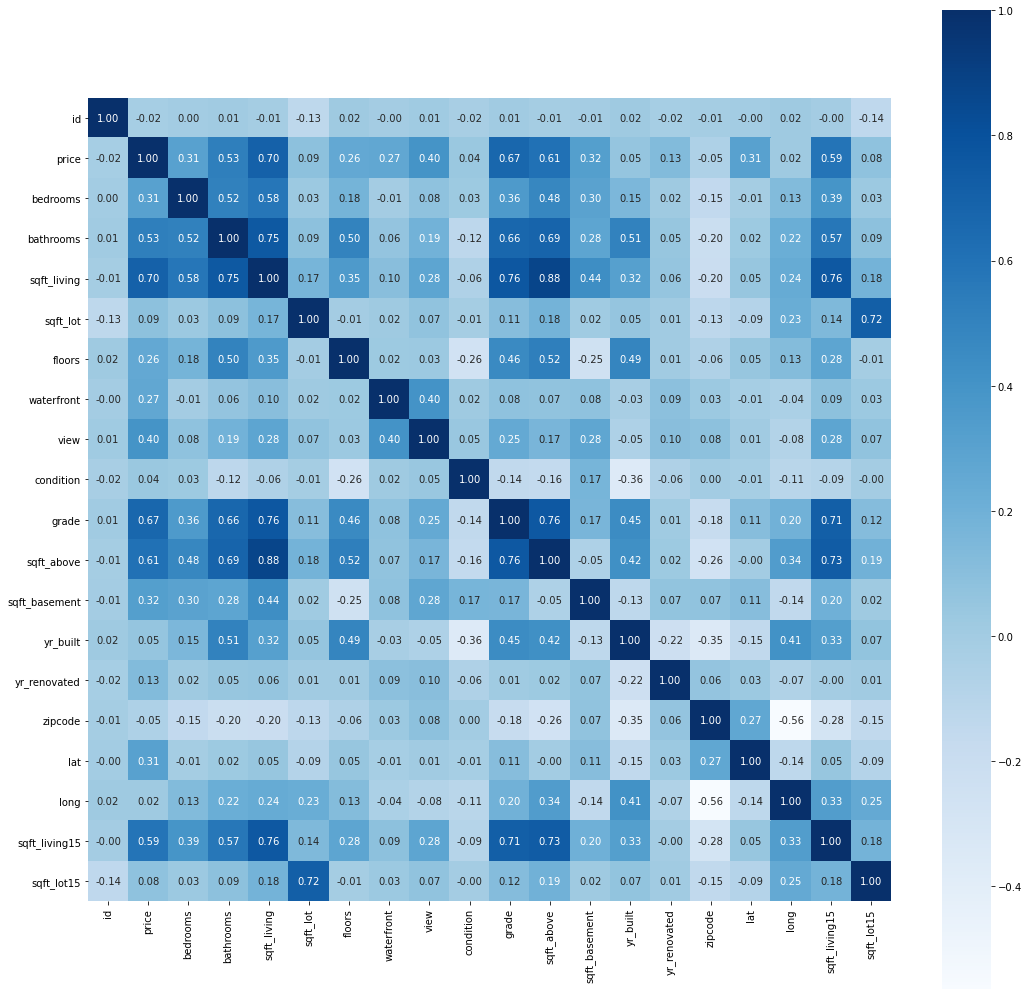

In [9]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(),annot=True,cmap="Blues",fmt='.2f',square=True)

# Feature Engineering

In [10]:
df =df.drop(["id"],axis = 1)

df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [11]:
df['date'] = pd.to_datetime(df['date'])

df['year'] = df['date'].dt.year

df['month'] = df['date'].dt.month

df['day'] = df['date'].dt.day

df.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18


In [12]:
df = df.drop(['date'],axis = 1)

In [13]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18


In [14]:

df['yr_built'].values[1763],df['yr_renovated'].values[1763],df['year'].values[1763]

(2015, 0, 2014)

In [15]:
df.loc[df["yr_renovated"] == 0, "yr_renovated"] = df['yr_built'] 

In [16]:
df['age'] = (df['year'] - df['yr_renovated'])

df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,age
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,1955,98178,47.5112,-122.257,1340,5650,2014,10,13,59
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,1991,98125,47.7210,-122.319,1690,7639,2014,12,9,23
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,1933,98028,47.7379,-122.233,2720,8062,2015,2,25,82
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,1965,98136,47.5208,-122.393,1360,5000,2014,12,9,49
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,1987,98074,47.6168,-122.045,1800,7503,2015,2,18,28


In [17]:
df.corr()["price"].sort_values(ascending = False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.105755
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
year             0.003576
month           -0.010081
day             -0.014670
zipcode         -0.053203
age             -0.105672
Name: price, dtype: float64

In [18]:
df = df.drop(columns = ['month','day','year','yr_built','yr_renovated'],axis = 1)

In [19]:
index=[]
x=0
for i in df['age'].values:
    if i<0:
        print(x,i)
        index.append(x)
    x+=1

1763 -1
2295 -1
2687 -1
7097 -1
7526 -1
8039 -1
11599 -1
14489 -1
14859 -1
15687 -1
17098 -1
18575 -1
19805 -1
20770 -1
20852 -1
20963 -1
21262 -1
21372 -1


In [20]:
# The age is in negative, because year_sold < year_built which is not possible. So dropping the rows which has age<0.

In [21]:
df = df.drop(index,axis = 0)
df = df.drop(columns = ['zipcode'],axis = 1)

In [22]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,age
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,47.5112,-122.257,1340,5650,59
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,47.7210,-122.319,1690,7639,23
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,47.7379,-122.233,2720,8062,82
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,47.5208,-122.393,1360,5000,49
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,47.6168,-122.045,1800,7503,28


# Cheking Skewness

<AxesSubplot:xlabel='price'>

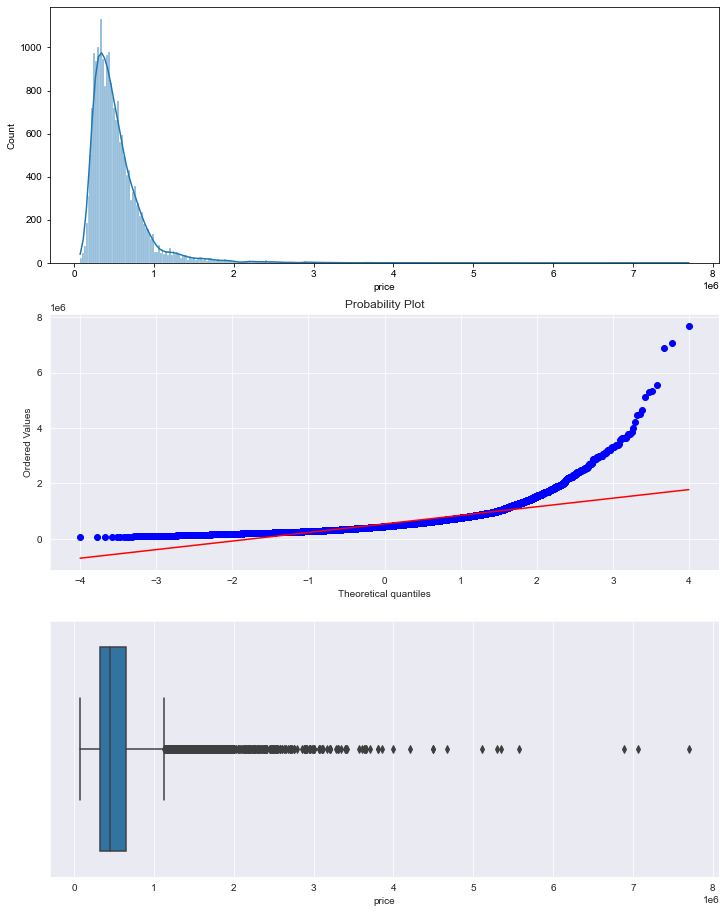

In [23]:
#Checking Skewness
fig=plt.figure(figsize=(12,16))
fig.tight_layout()
ax1 = fig.add_subplot(3, 1, 1)
sns.set_style("darkgrid")
sns.histplot(df.loc[:, 'price'],kde=True,ax=ax1)

ax2 = fig.add_subplot(3, 1, 2)
stats.probplot(df.loc[:,'price'],plot=ax2)

ax3 = fig.add_subplot(3, 1, 3)
sns.boxplot(x=df.loc[:, 'price'],ax=ax3)

In [24]:
df['price']=boxcox(df['price'])[0]

<AxesSubplot:xlabel='price'>

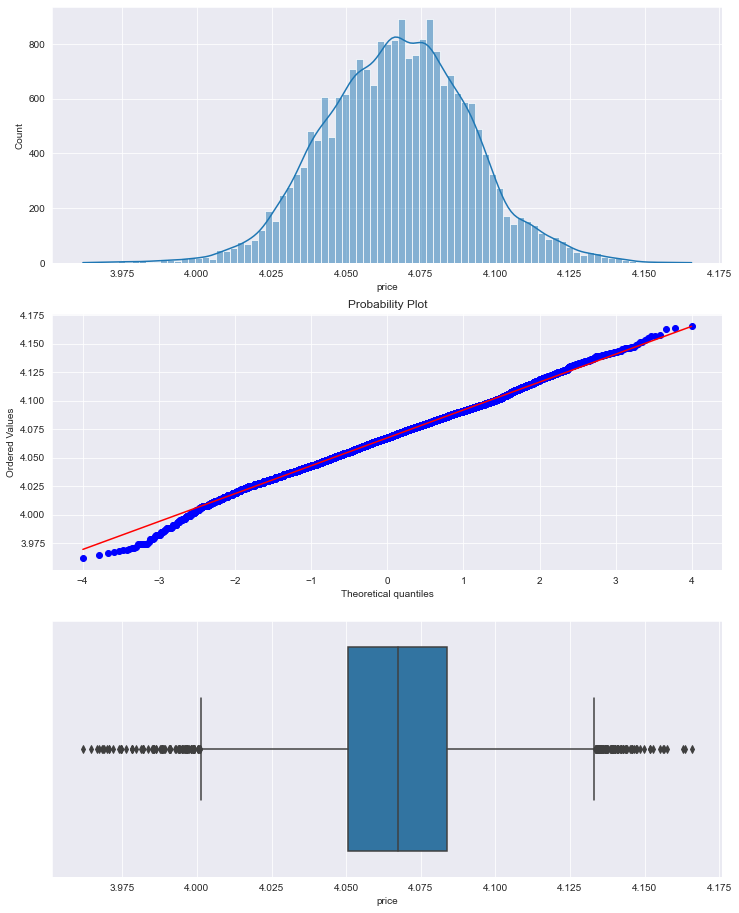

In [25]:
#Checking Skewness
fig=plt.figure(figsize=(12,16))
fig.tight_layout()
ax1 = fig.add_subplot(3, 1, 1)
sns.set_style("darkgrid")
sns.histplot(df.loc[:, 'price'],kde=True,ax=ax1)

ax2 = fig.add_subplot(3, 1, 2)
stats.probplot(df.loc[:,'price'],plot=ax2)

ax3 = fig.add_subplot(3, 1, 3)
sns.boxplot(x=df.loc[:, 'price'],ax=ax3)

In [26]:
df.shape

(21595, 17)

In [27]:
i=0
while i<df.shape[1]:
    x=df.columns[i]
    if df[x].dtypes!=object and abs(df[x]).skew() >0.5 and i!=0:
        df[x]=stats.boxcox(df[x]+1)[0]
    i+=1

In [28]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,age
0,4.030919,1.845296,0.790440,7.814065,4.195162,0.433862,0.0,0.0,0.808633,1.541221,3.465662,0.000000,47.5112,-122.257,3.495204,4.044489,13.083146
1,4.075683,1.845296,1.478450,8.770486,4.240651,0.543474,0.0,0.0,0.808633,1.541221,3.574816,3.395888,47.7210,-122.319,3.537534,4.094120,7.622875
2,4.018914,1.375287,0.790440,7.298470,4.296609,0.433862,0.0,0.0,0.808633,1.468803,3.379444,0.000000,47.7379,-122.233,3.617536,4.102669,15.682496
3,4.080876,2.248442,1.812704,8.435165,4.171951,0.433862,0.0,0.0,0.912112,1.541221,3.442928,3.607690,47.5208,-122.393,3.497975,4.023488,11.793674
4,4.073237,1.845296,1.356321,8.245539,4.260032,0.433862,0.0,0.0,0.808633,1.602703,3.530833,0.000000,47.6168,-122.045,3.548648,4.091249,8.559567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,4.056522,1.845296,1.594803,8.130891,3.841087,0.589749,0.0,0.0,0.808633,1.602703,3.514097,0.000000,47.6993,-122.346,3.519669,3.787224,2.865204
21609,4.061723,2.248442,1.594803,8.638189,4.200485,0.543474,0.0,0.0,0.808633,1.602703,3.585168,0.000000,47.5107,-122.362,3.551535,4.084621,0.824969
21610,4.061978,1.375287,0.621954,7.637361,3.885643,0.543474,0.0,0.0,0.808633,1.541221,3.437186,0.000000,47.5944,-122.299,3.442432,3.848833,2.865204
21611,4.061723,1.845296,1.594803,8.185693,4.019296,0.543474,0.0,0.0,0.808633,1.602703,3.522148,0.000000,47.5345,-122.069,3.504688,3.751252,4.845038


# Scaling

In [29]:
df_scaled=df
from sklearn.preprocessing import StandardScaler
#scaled=RobustScaler()
scaled = StandardScaler()

df_scaled = pd.DataFrame(scaled.fit_transform(df),columns=df.columns)

df_scaled.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,age
0,-1.487163,-0.352330,-1.571621,-1.121672,-0.332344,-0.975183,-0.087209,-0.329935,-0.598191,-0.513782,-0.736062,-0.802136,-0.351899,-0.306674,-1.043012,-0.342327,0.721410
1,0.341151,-0.352330,0.251450,0.706994,-0.032751,1.030360,-0.087209,-0.329935,-0.598191,-0.513782,0.704643,1.178243,1.162150,-0.746888,-0.293939,0.057379,-0.461401
2,-1.977451,-1.606097,-1.571621,-2.107485,0.335789,-0.975183,-0.087209,-0.329935,-0.598191,-1.565215,-1.874040,-0.802136,1.284111,-0.136269,1.121791,0.126235,1.284485
3,0.553232,0.723079,1.137145,0.065865,-0.485213,-0.975183,-0.087209,-0.329935,2.080336,-0.513782,-1.036126,1.301759,-0.282619,-1.272304,-0.993977,-0.511466,0.442083
4,0.241236,-0.352330,-0.072163,-0.296698,0.094890,-0.975183,-0.087209,-0.329935,-0.598191,0.378870,0.124126,-0.802136,0.410177,1.198572,-0.097254,0.034259,-0.258493


# Dummies

In [30]:
features = pd.get_dummies(df_scaled).reset_index(drop=True)
features.shape

(21595, 17)

In [31]:
X = df_scaled.drop(['price'],axis = 1)
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,age
0,-0.352330,-1.571621,-1.121672,-0.332344,-0.975183,-0.087209,-0.329935,-0.598191,-0.513782,-0.736062,-0.802136,-0.351899,-0.306674,-1.043012,-0.342327,0.721410
1,-0.352330,0.251450,0.706994,-0.032751,1.030360,-0.087209,-0.329935,-0.598191,-0.513782,0.704643,1.178243,1.162150,-0.746888,-0.293939,0.057379,-0.461401
2,-1.606097,-1.571621,-2.107485,0.335789,-0.975183,-0.087209,-0.329935,-0.598191,-1.565215,-1.874040,-0.802136,1.284111,-0.136269,1.121791,0.126235,1.284485
3,0.723079,1.137145,0.065865,-0.485213,-0.975183,-0.087209,-0.329935,2.080336,-0.513782,-1.036126,1.301759,-0.282619,-1.272304,-0.993977,-0.511466,0.442083
4,-0.352330,-0.072163,-0.296698,0.094890,-0.975183,-0.087209,-0.329935,-0.598191,0.378870,0.124126,-0.802136,0.410177,1.198572,-0.097254,0.034259,-0.258493


In [32]:
y = df_scaled['price']
y.head()

0   -1.487163
1    0.341151
2   -1.977451
3    0.553232
4    0.241236
Name: price, dtype: float64

In [33]:
rms=[]
mse=[]
mae=[]
r2=[]

def evaluation(model, x_test, y_test):
        pred = model.predict(x_test)
        
        rms.append(np.sqrt(mean_squared_error(y_test, pred)))
        
        mse.append(mean_squared_error(y_test, pred))
        
        mae.append(mean_absolute_error(y_test, pred))
        
        r2.append(r2_score(y_test,pred))
        
        print("Result\n","---------------------------------------------")
        print("\nRoot Mean Squared Error: ",np.sqrt(mean_squared_error(y_test, pred)))
        print("\nMean Squared Error: \t",mean_squared_error(y_test, pred))
        print("\nMean Absolute Error: \t",mean_absolute_error(y_test, pred))
        print("\nR2 Score: \t\t",r2_score(y_test,pred))

# Spliting data for training and testing

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Linear Regression

In [35]:
lg  = LinearRegression() 

model=lg.fit(X_train,y_train)

y_pred_lg = lg.predict(X_test)

y_pred_lg

array([-1.34381624, -0.15454372, -0.02232806, ..., -0.0058335 ,
       -0.83150375, -0.2049119 ])

In [36]:
evaluation(model, X_test, y_test)

Result
 ---------------------------------------------

Root Mean Squared Error:  0.5107123586919792

Mean Squared Error: 	 0.26082711332072483

Mean Absolute Error: 	 0.391958205061279

R2 Score: 		 0.7393462089171894


# KNN

In [37]:

kr = KNeighborsRegressor(n_neighbors=10)
model=kr.fit(X_train,y_train)

In [38]:
evaluation(model, X_test, y_test)

Result
 ---------------------------------------------

Root Mean Squared Error:  0.42202253003026213

Mean Squared Error: 	 0.1781030158531435

Mean Absolute Error: 	 0.30242172317552296

R2 Score: 		 0.8220153353906897


# SVR

In [39]:
sv = SVR(kernel = 'rbf')
model=sv.fit(X_train, y_train)

In [40]:
evaluation(model, X_test, y_test)

Result
 ---------------------------------------------

Root Mean Squared Error:  0.38780732856598055

Mean Squared Error: 	 0.1503945240894824

Mean Absolute Error: 	 0.2730300617046993

R2 Score: 		 0.8497054145831248


# XGB 

In [41]:
xgb_regress = xgb.XGBRegressor(n_estimators = 2000, learning_rate = 0.1)
l=xgb_regress.fit(X_train, y_train)

y_pred_xg = l.predict(X_test)
accuracy = round(r2_score(y_test,y_pred_xg),3)
accuracy

0.879

In [42]:
evaluation(l, X_test, y_test)

Result
 ---------------------------------------------

Root Mean Squared Error:  0.3481417810946497

Mean Squared Error: 	 0.12120269974375499

Mean Absolute Error: 	 0.23691109537962213

R2 Score: 		 0.878877840668219


# Gradient Boosting

In [43]:

params = {
    "n_estimators": 1000,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.1
}

reg = ensemble.GradientBoostingRegressor(**params)
l=reg.fit(X_train, y_train)

In [44]:
evaluation(l, X_test, y_test)

Result
 ---------------------------------------------

Root Mean Squared Error:  0.3397205518739977

Mean Squared Error: 	 0.11541005336557356

Mean Absolute Error: 	 0.23384886750326775

R2 Score: 		 0.8846666377746705


# ADABOOST

In [45]:
regr = ensemble.AdaBoostRegressor(random_state=0, n_estimators=1000)
l=regr.fit(X_train, y_train)

In [46]:
evaluation(l, X_test, y_test)

Result
 ---------------------------------------------

Root Mean Squared Error:  0.4985404861954686

Mean Squared Error: 	 0.24854261637601419

Mean Absolute Error: 	 0.38537733668965807

R2 Score: 		 0.7516225426902305


# Random Forest

In [47]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

# fit the regressor with x and y data
l=regressor.fit(X_train, y_train) 

In [48]:
evaluation(l, X_test, y_test)

Result
 ---------------------------------------------

Root Mean Squared Error:  0.36239858625509846

Mean Squared Error: 	 0.13133273531969406

Mean Absolute Error: 	 0.24957256832632102

R2 Score: 		 0.8687545366027192


# CAT Boost

In [49]:
model = cb.CatBoostRegressor(iterations=1000,
                          learning_rate=0.1,
                          depth=8)
# Fit model
cat=model.fit(X_train, y_train)


0:	learn: 0.9314973	total: 156ms	remaining: 2m 35s
1:	learn: 0.8703926	total: 164ms	remaining: 1m 22s
2:	learn: 0.8132449	total: 173ms	remaining: 57.3s
3:	learn: 0.7617152	total: 181ms	remaining: 45.1s
4:	learn: 0.7153295	total: 189ms	remaining: 37.7s
5:	learn: 0.6777702	total: 197ms	remaining: 32.7s
6:	learn: 0.6426906	total: 205ms	remaining: 29.1s
7:	learn: 0.6101366	total: 213ms	remaining: 26.5s
8:	learn: 0.5829402	total: 221ms	remaining: 24.3s
9:	learn: 0.5584274	total: 229ms	remaining: 22.7s
10:	learn: 0.5363441	total: 237ms	remaining: 21.3s
11:	learn: 0.5171809	total: 246ms	remaining: 20.3s
12:	learn: 0.4997535	total: 255ms	remaining: 19.4s
13:	learn: 0.4853623	total: 264ms	remaining: 18.6s
14:	learn: 0.4692499	total: 272ms	remaining: 17.9s
15:	learn: 0.4555180	total: 280ms	remaining: 17.2s
16:	learn: 0.4451452	total: 288ms	remaining: 16.6s
17:	learn: 0.4350465	total: 296ms	remaining: 16.2s
18:	learn: 0.4267540	total: 304ms	remaining: 15.7s
19:	learn: 0.4183268	total: 312ms	remai

In [50]:
evaluation(cat, X_test, y_test)

Result
 ---------------------------------------------

Root Mean Squared Error:  0.33141486335313103

Mean Squared Error: 	 0.1098358116513745

Mean Absolute Error: 	 0.22662380597553808

R2 Score: 		 0.8902371753492335


# Results

In [51]:
res=pd.DataFrame()
res['Model']=["LR","KNN","SVM","XGB","GRA","ADA","RF","CAT"]
res['RMSE']=rms
res['MSE']=mse
res['MAE']=mae
res['R2']=r2

In [52]:
res

,Model,RMSE,MSE,MAE,R2
0,LR,0.510712,0.260827,0.391958,0.739346
1,KNN,0.422023,0.178103,0.302422,0.822015
2,SVM,0.387807,0.150395,0.273030,0.849705
3,XGB,0.348142,0.121203,0.236911,0.878878
4,GRA,0.339721,0.115410,0.233849,0.884667
5,ADA,0.498540,0.248543,0.385377,0.751623
6,RF,0.362399,0.131333,0.249573,0.868755
7,CAT,0.331415,0.109836,0.226624,0.890237


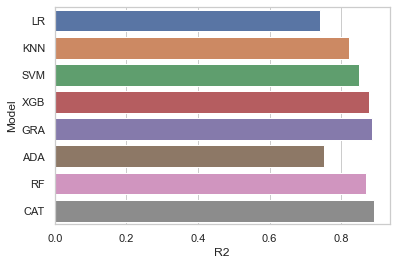

In [53]:
sns.set(style="whitegrid")
ax=sns.barplot(y='Model',x='R2',data=res)